In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv('Student_performance_data _.csv')

In [4]:
print(df.head())

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [5]:
# Define the target variable
y = df['GradeClass']

In [6]:
# Define the features (all columns except GradeClass and StudentID)
X = df.drop(['GradeClass', 'StudentID'], axis=1)

In [7]:
# Check the shape of our data
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (2392, 13)
Shape of y (target): (2392,)


In [8]:
# Split data into training and testing sets
# test_size=0.2 means 20% of data is for testing
# random_state=42 ensures you get the same "random" split every time you run it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print("Number of rows in training set:", X_train.shape[0])
print("Number of rows in testing set:", X_test.shape[0])

Number of rows in training set: 1913
Number of rows in testing set: 479


In [10]:
# 1. Create the model
# We are creating an instance of the DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

In [11]:
# 2. Train the model
# The .fit() command is the "learning" step.
# It learns the patterns from your training data (X_train, y_train).
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
# 3. Make predictions
# Now, we ask the model to predict the GradeClass for the test data (X_test),
# which it has never seen before.
y_pred = model.predict(X_test)

In [16]:
# 4. Evaluate the model
# We compare the model's predictions (y_pred) to the
# actual answers (y_test) to see how accurate it was.
accuracy = accuracy_score(y_test, y_pred)

In [17]:
print(f"Congratulations! Your first model is trained.")
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")


Congratulations! Your first model is trained.
Accuracy on the test set: 83.30%


In [18]:
# Create a new DataFrame to compare actual vs. predicted
results_df = pd.DataFrame({'Actual GradeClass': y_test, 
                           'Predicted GradeClass': y_pred})

# Display the first 20 results
print(results_df.head(20))

      Actual GradeClass  Predicted GradeClass
1004                4.0                   4.0
196                 1.0                   1.0
2342                2.0                   3.0
1708                0.0                   0.0
435                 4.0                   4.0
321                 2.0                   2.0
1472                3.0                   4.0
1703                3.0                   3.0
900                 3.0                   3.0
1057                4.0                   4.0
2213                1.0                   3.0
575                 4.0                   4.0
1163                2.0                   0.0
2314                2.0                   3.0
611                 2.0                   2.0
432                 4.0                   4.0
1735                4.0                   4.0
1134                4.0                   4.0
1991                3.0                   3.0
650                 3.0                   4.0


Top 10 Most Important Features:
              feature  importance
12                GPA    0.858372
4     StudyTimeWeekly    0.051031
5            Absences    0.020249
2           Ethnicity    0.014006
7     ParentalSupport    0.011224
3   ParentalEducation    0.010662
0                 Age    0.010504
9              Sports    0.006221
11       Volunteering    0.005594
6            Tutoring    0.003749


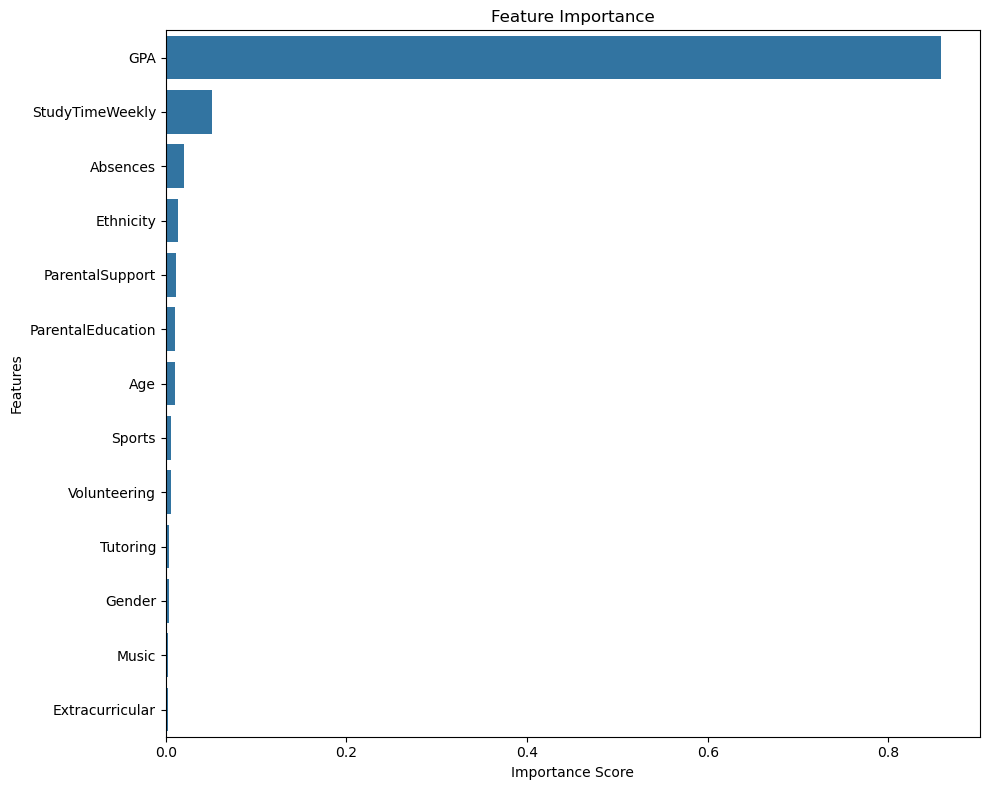

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the model
importances = model.feature_importances_

# Create a DataFrame to view them easily, sorted by importance
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Print the top 10 most important features
print("Top 10 Most Important Features:")
print(feature_importances.head(10))

# Plot all feature importances for a visual view
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('feature_importance.png')

In [20]:
# --- Let's build a new, more realistic model ---

# 1. Define new features (X), this time dropping GPA
X_real = df.drop(['GradeClass', 'StudentID', 'GPA'], axis=1)

# y (our target) is still the same
y = df['GradeClass']

# 2. Split the data again
X_train, X_test, y_train, y_test = train_test_split(X_real, y, test_size=0.2, random_state=42)

# 3. Create and train a new model
model_real = DecisionTreeClassifier(random_state=42)
model_real.fit(X_train, y_train)

# 4. Evaluate our new, more realistic model
y_pred_real = model_real.predict(X_test)
accuracy_real = accuracy_score(y_test, y_pred_real)

print(f"--- Realistic Model ---")
print(f"Accuracy without GPA: {accuracy_real * 100:.2f}%")

--- Realistic Model ---
Accuracy without GPA: 61.80%



Top 10 Most Important Features (Realistic Model):
              feature  importance
5            Absences    0.424892
4     StudyTimeWeekly    0.184456
7     ParentalSupport    0.076845
3   ParentalEducation    0.055090
0                 Age    0.053092
2           Ethnicity    0.040150
8     Extracurricular    0.033467
6            Tutoring    0.033019
9              Sports    0.027736
10              Music    0.026838


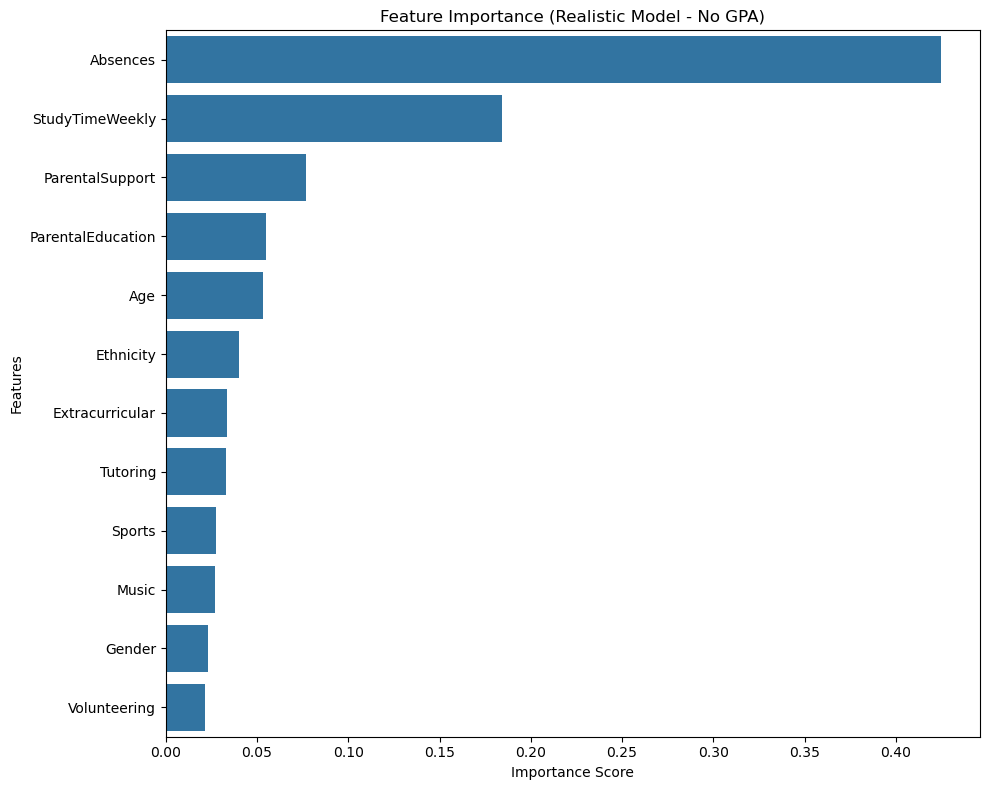

In [21]:
# --- Check feature importances for the REAL model ---

importances_real = model_real.feature_importances_
feature_importances_real = pd.DataFrame({'feature': X_real.columns, 'importance': importances_real})
feature_importances_real = feature_importances_real.sort_values(by='importance', ascending=False)

print("\nTop 10 Most Important Features (Realistic Model):")
print(feature_importances_real.head(10))

# Plot the new importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_real)
plt.title('Feature Importance (Realistic Model - No GPA)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('feature_importance_real.png')

In [24]:
# --- Make Your Own Prediction ---

# Your model was trained on these 12 features, in this exact order:
# ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
#  'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular',
#  'Sports', 'Music', 'Volunteering']

# Let's create a custom student.
# Change these values to anything you want!
student_age = 23
student_gender = 1  # (e.g., 1 for Male, 0 for Female)
student_ethnicity = 0 # (0-3)
student_parent_edu = 2 # (0-4)
student_study_time = 1.5 # (hours per week)
student_absences = 5 # (number of absences)
student_tutoring = 0 # (1 for yes, 0 for no)
student_parent_support = 0 # (0-4)
student_extracurricular = 0 # (1 for yes, 0 for no)
student_sports = 1 # (1 for yes, 0 for no)
student_music = 0 # (1 for yes, 0 for no)
student_volunteering = 0 # (1 for yes, 0 for no)

# Put them all into a single list
# NOTE: It must be inside double brackets [[...]]
# because the model expects a 2D array (or a list of students)
my_student = [[
    student_age,
    student_gender,
    student_ethnicity,
    student_parent_edu,
    student_study_time,
    student_absences,
    student_tutoring,
    student_parent_support,
    student_extracurricular,
    student_sports,
    student_music,
    student_volunteering
]]

# Get the prediction from your trained model
# (Make sure you have already run the cell that defines 'model_real')
my_prediction = model_real.predict(my_student)

print(f"The model predicts this student will be in: GradeClass {my_prediction[0]}")

The model predicts this student will be in: GradeClass 1.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
